# eksperimen agglomerative hierarchical clustering (ahc)
disini saya mencoba bereksperimen sendiri dari materi pdf yang ada pada step by step ahc

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances


## dataset awal
dataset 2D yang digunakan terdiri dari 5 data sebagai berikut:

In [13]:
# data
data = np.array([
    [1, 1],
    [4, 1],
    [1, 2],
    [3, 4],
    [5, 4]
])
df = pd.DataFrame(data, columns=["x", "y"])
df.index = np.arange(1, 6)
df


,x,y
1,1,1
2,4,1
3,1,2
4,3,4
5,5,4


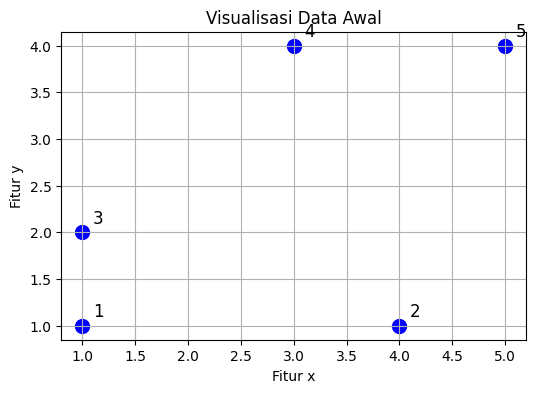

In [14]:
# visualisasi data awal
plt.figure(figsize=(6, 4))
plt.scatter(data[:, 0], data[:, 1], c='blue', s=100)
for i, (x, y) in enumerate(data, 1):
    plt.text(x + 0.1, y + 0.1, str(i), fontsize=12)
plt.title("Visualisasi Data Awal")
plt.xlabel("Fitur x")
plt.ylabel("Fitur y")
plt.grid(True)
plt.show()


## matriks jarak manhattan

In [15]:
# mengitung matriks jarak manhattan
manhattan_dist = pairwise_distances(data, metric='manhattan')
pd.DataFrame(manhattan_dist, index=df.index, columns=df.index)


,1,2,3,4,5
1,0.0,3.0,1.0,5.0,7.0
2,3.0,0.0,4.0,4.0,4.0
3,1.0,4.0,0.0,4.0,6.0
4,5.0,4.0,4.0,0.0,2.0
5,7.0,4.0,6.0,2.0,0.0


## matriks jarak euclidean

In [5]:
# menghitung matriks jarak euclidean
euclidean_dist = pairwise_distances(data, metric='euclidean')
pd.DataFrame(euclidean_dist, index=df.index, columns=df.index)


,1,2,3,4,5
1,0.000000,3.000000,1.000000,3.605551,5.000000
2,3.000000,0.000000,3.162278,3.162278,3.162278
3,1.000000,3.162278,0.000000,2.828427,4.472136
4,3.605551,3.162278,2.828427,0.000000,2.000000
5,5.000000,3.162278,4.472136,2.000000,0.000000


## dendrogram single linkage (jarak terdekat)

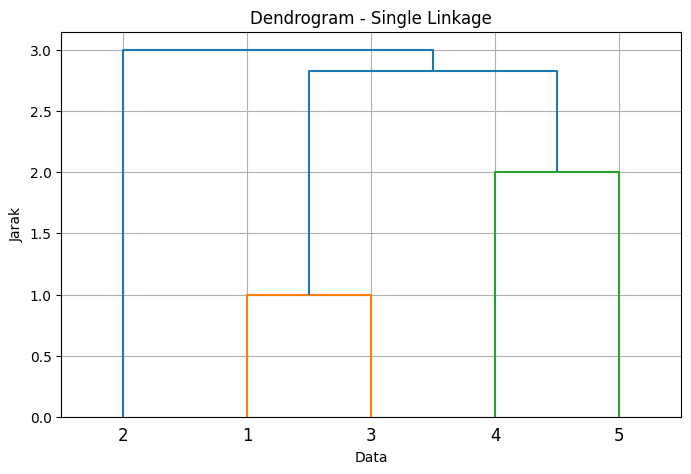

In [6]:
plt.figure(figsize=(8, 5))
dend = sch.dendrogram(sch.linkage(data, method='single', metric='euclidean'), labels=df.index)
plt.title("Dendrogram - Single Linkage")
plt.xlabel("Data")
plt.ylabel("Jarak")
plt.grid(True)
plt.show()


## dendrogram - complete linkage (jarak terjauh)

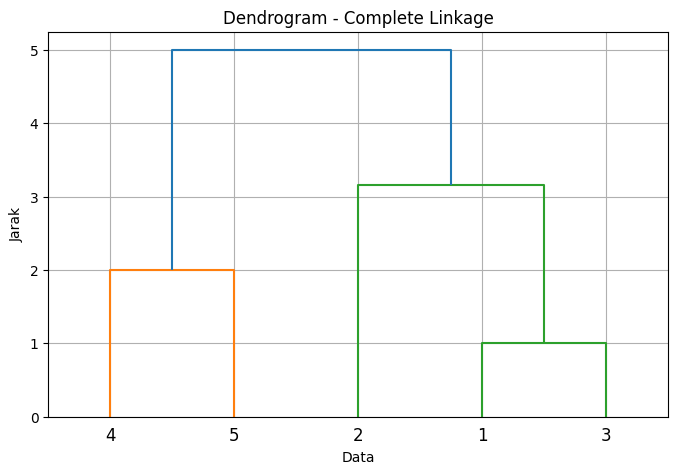

In [7]:
plt.figure(figsize=(8, 5))
dend = sch.dendrogram(sch.linkage(data, method='complete', metric='euclidean'), labels=df.index)
plt.title("Dendrogram - Complete Linkage")
plt.xlabel("Data")
plt.ylabel("Jarak")
plt.grid(True)
plt.show()


## dendrogram average linkage (jarak rata-rata)

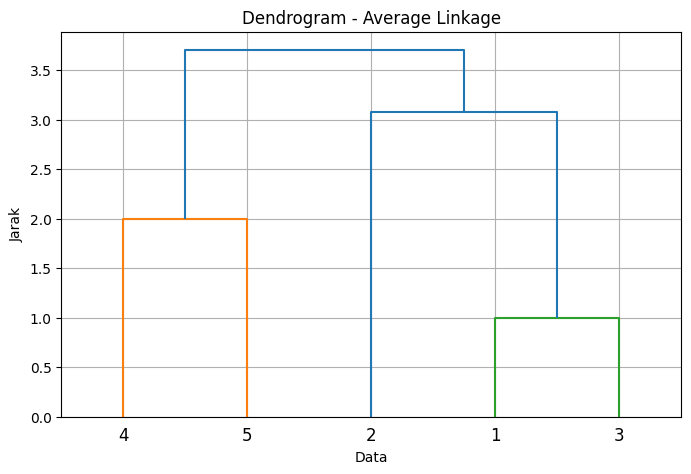

In [8]:
plt.figure(figsize=(8, 5))
dend = sch.dendrogram(sch.linkage(data, method='average', metric='euclidean'), labels=df.index)
plt.title("Dendrogram - Average Linkage")
plt.xlabel("Data")
plt.ylabel("Jarak")
plt.grid(True)
plt.show()


## hasil clustering (contoh: 2 cluster dengan average linkage)

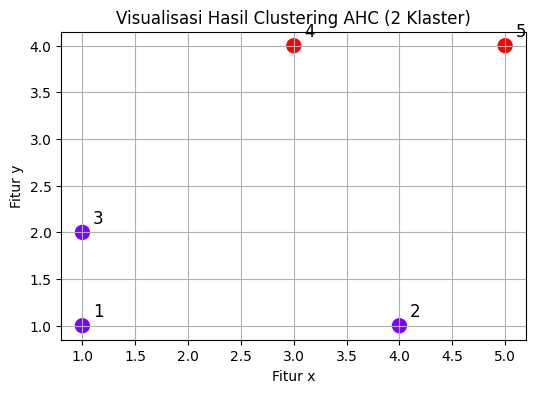

In [11]:
# membuat clustering
model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='average')
labels = model.fit_predict(data)

# visualisasi hasil
plt.figure(figsize=(6, 4))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', s=100)
for i, (x, y) in enumerate(data, 1):
    plt.text(x + 0.1, y + 0.1, str(i), fontsize=12)
plt.title("Visualisasi Hasil Clustering AHC (2 Klaster)")
plt.xlabel("Fitur x")
plt.ylabel("Fitur y")
plt.grid(True)
plt.show()